<a href="https://colab.research.google.com/github/anish2105/Stress-Classifer/blob/main/Stress_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi-Class Stress Detector Using RNN**

In [169]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
import string
from keras.layers import Dropout
from nltk.tokenize import TweetTokenizer


In [126]:
df = pd.read_csv('/content/dreaddit_StressAnalysis - Sheet1.csv')
df.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1514980773,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1493348050,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1524516630,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1524018289,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1516200171,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [127]:
data = df[['subreddit' , 'text']]

In [128]:
data.head()

,subreddit,text
0,relationships,"Its like that, if you want or not.“ ME: I have..."
1,anxiety,I man the front desk and my title is HR Custom...
2,ptsd,We'd be saving so much money with this new hou...
3,ptsd,"My ex used to shoot back with ""Do you want me ..."
4,relationships,I haven’t said anything to him yet because I’m...


In [129]:
unique_values = len(data['subreddit'].unique())
unique_values 

10

In [130]:
data['text'] = data['text'].astype('str')

<ipython-input-130-2b34dc1dca25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype('str')


In [131]:
data.isna().sum()

subreddit    0
text         0
dtype: int64

In [132]:
data['text'] = data['text'].str.lower()
data.head()

<ipython-input-132-c88097a19625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.lower()


,subreddit,text
0,relationships,"its like that, if you want or not.“ me: i have..."
1,anxiety,i man the front desk and my title is hr custom...
2,ptsd,we'd be saving so much money with this new hou...
3,ptsd,"my ex used to shoot back with ""do you want me ..."
4,relationships,i haven’t said anything to him yet because i’m...


In [133]:
data['text'][35]

'we are down to less than $100 for another week and 4 days. her weight watchers is due, and she is sad we may have to cancel. i am already doing what i can, and anything seemingly extra goes towards our 3 kids which we love dearly. i started a gofundme. i am looking for $100 so i can give her money towards weight watchers.'

**Removal of @ and User names**

In [134]:
tknzr = TweetTokenizer(strip_handles=True)

for a in range(len(data['text'])):

  result = tknzr.tokenize(data['text'][a])
  res=" ".join(result)
  data['text'][a]=res
print("\nTokenize a twitter text:")
print(data['text'][10])


<ipython-input-134-ae51779103b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][a]=res



Tokenize a twitter text:
i've always hated nail files . somehow that's a part of this . god . i'm confused by it all . it's a feeling to recall it that i've carried my whole life but never understood like a cloud .


**Remove Punctuations**

In [135]:
punct_to_remove = string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('','',punct_to_remove))

data['text'] = data['text'].apply(lambda text:remove_punctuation(text))
data.head()

<ipython-input-135-c2d87b989dc8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda text:remove_punctuation(text))


,subreddit,text
0,relationships,its like that if you want or not “ me i hav...
1,anxiety,i man the front desk and my title is hr custom...
2,ptsd,wed be saving so much money with this new hous...
3,ptsd,my ex used to shoot back with do you want me ...
4,relationships,i haven ’ t said anything to him yet because i...


In [136]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem
data.text = data.text.apply(is_special)
data.text[0]

<ipython-input-136-f71d68ad4a15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.text = data.text.apply(is_special)


'its like that  if you want or not    me  i have no problem  if it takes longer  but you asked my friend for help and let him wait for one hour and then you haven   t prepared anything  thats not what you asked for  instead of 3 hours  he helped you for 10 hours till 5am '

**Labeling the target fields**

In [137]:
encoded_df = pd.get_dummies(data = data , columns = ['subreddit'])
encoded_df

,text,subreddit_almosthomeless,subreddit_anxiety,subreddit_assistance,subreddit_domesticviolence,subreddit_food_pantry,subreddit_homeless,subreddit_ptsd,subreddit_relationships,subreddit_stress,subreddit_survivorsofabuse
0,its like that if you want or not me i hav...,0,0,0,0,0,0,0,1,0,0
1,i man the front desk and my title is hr custom...,0,1,0,0,0,0,0,0,0,0
2,wed be saving so much money with this new hous...,0,0,0,0,0,0,1,0,0,0
3,my ex used to shoot back with do you want me ...,0,0,0,0,0,0,1,0,0,0
4,i haven t said anything to him yet because i...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
710,i have horrible vivid nightmares every night ...,0,0,0,0,0,0,1,0,0,0
711,also i cant think about both of them without g...,0,0,0,0,0,0,0,1,0,0
712,furthermore i told him before we got really s...,0,0,0,0,0,0,0,1,0,0
713,heres the link to my amazon wish list where th...,0,0,1,0,0,0,0,0,0,0


**Renaming column names into a shortforms**

In [138]:
new_column_names = ['text','almosthomeless', 'anxiety', 'assistance', 'domesticviolence',
       'food_pantry', 'homeless', 'ptsd', 'relationships', 'stress',
       'survivorsofabuse']
encoded_df.columns = new_column_names

In [139]:
encoded_df

,text,almosthomeless,anxiety,assistance,domesticviolence,food_pantry,homeless,ptsd,relationships,stress,survivorsofabuse
0,its like that if you want or not me i hav...,0,0,0,0,0,0,0,1,0,0
1,i man the front desk and my title is hr custom...,0,1,0,0,0,0,0,0,0,0
2,wed be saving so much money with this new hous...,0,0,0,0,0,0,1,0,0,0
3,my ex used to shoot back with do you want me ...,0,0,0,0,0,0,1,0,0,0
4,i haven t said anything to him yet because i...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
710,i have horrible vivid nightmares every night ...,0,0,0,0,0,0,1,0,0,0
711,also i cant think about both of them without g...,0,0,0,0,0,0,0,1,0,0
712,furthermore i told him before we got really s...,0,0,0,0,0,0,0,1,0,0
713,heres the link to my amazon wish list where th...,0,0,1,0,0,0,0,0,0,0


**Importing libaries**

In [140]:
import os
import re

import numpy as np
import tensorflow as tf

# np.random.seed(1)
# tf.set_random_seed(2)

import pandas as pd
import keras
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

# !pip install keras_preprocessing
from keras.preprocessing.text import Tokenizer
# from keras_preprocessing.sequence import pad_sequences
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
# from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [141]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
def cleaning_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stopwords])

encoded_df['text'] = encoded_df['text'].apply(lambda text : cleaning_stopwords(text))
encoded_df['text'].head()

0    like want problem takes longer asked friend he...
1    man front desk title hr customer service repre...
2    wed saving much money new housr expensive city...
3    ex used shoot back want go time matter almost ...
4    said anything yet sure someone would take hear...
Name: text, dtype: object

**Lemmentization**

In [143]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
encoded_df['text'] = encoded_df['text'].apply(lambda x: lemmatizer_on_text(x))
encoded_df['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    like want problem takes longer asked friend he...
1    man front desk title hr customer service repre...
2    wed saving much money new housr expensive city...
3    ex used shoot back want go time matter almost ...
4    said anything yet sure someone would take hear...
Name: text, dtype: object

In [144]:
x = encoded_df['text']
y = encoded_df.iloc[: , 1:]

In [145]:
y

,almosthomeless,anxiety,assistance,domesticviolence,food_pantry,homeless,ptsd,relationships,stress,survivorsofabuse
0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
710,0,0,0,0,0,0,1,0,0,0
711,0,0,0,0,0,0,0,1,0,0
712,0,0,0,0,0,0,0,1,0,0
713,0,0,1,0,0,0,0,0,0,0


In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(x, y,random_state = 42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(643,)
(72,)


In [147]:
print(y_train.shape)
print(y_test.shape)

(643, 10)
(72, 10)


In [148]:
X_test

120    url learn disabilities like read post url talk...
570    wanted believed said would talk toe days later...
39     server encourages happiness improving glamoriz...
294    anyone dealt urinary retention side effect lex...
666    cw mentions selfharm suicide feel overwhelmed ...
                             ...                        
286    best friend nearly 20 years dealing anxiety ar...
617    bad situation stuck nashville friends family m...
664    probably know created political survey last we...
399    get intrusive memories really hard get head so...
698    im last year secondary school mocks doesnt mea...
Name: text, Length: 72, dtype: object

**Text Sequencing**

In [149]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower = False)
tokenizer.fit_on_texts(X_train)
train_text_vec = tokenizer.texts_to_sequences(X_train)
tokenizer.fit_on_texts(X_test)
test_text_vec = tokenizer.texts_to_sequences(X_test)
test_text_vec

[[172,
  794,
  2173,
  2,
  287,
  155,
  172,
  50,
  5429,
  9,
  154,
  479,
  289,
  36,
  84,
  66,
  954,
  43,
  211,
  204,
  6,
  287],
 [96,
  888,
  47,
  7,
  50,
  953,
  70,
  191,
  232,
  30,
  5430,
  2583,
  685,
  286,
  953,
  358,
  1,
  5431,
  2756,
  8,
  11,
  5,
  187,
  4,
  75,
  953,
  1688,
  726,
  26,
  8,
  5],
 [5432,
  5433,
  2722,
  1863,
  5434,
  152,
  1766,
  2717,
  18,
  1055,
  5435,
  800,
  31,
  505,
  152,
  1766,
  5436,
  63,
  505,
  13,
  16,
  1891,
  2113,
  907,
  520,
  50,
  18,
  361,
  716,
  34,
  120,
  1784,
  430,
  172],
 [41,
  1681,
  2808,
  2809,
  455,
  1362,
  1133,
  10,
  204,
  1133,
  2,
  134,
  135,
  100,
  45,
  366,
  387,
  1407,
  11,
  57,
  90,
  444,
  115,
  963,
  5437,
  19,
  197,
  2,
  602,
  2763,
  17,
  769,
  116,
  17,
  303,
  2,
  51,
  547,
  5438,
  373,
  11,
  104,
  544,
  288,
  771,
  43,
  141,
  862,
  1456,
  2808,
  2809,
  38,
  455,
  971,
  1133],
 [5439,
  1999,
  2270,
  7

In [150]:
max_length = max([len(seq) for seq in (train_text_vec + test_text_vec)])
from keras.preprocessing import sequence
max_words = max_length
X_train = keras.utils.pad_sequences(train_text_vec, maxlen=max_words)
X_test = keras.utils.pad_sequences(test_text_vec, maxlen=max_words)
modelRNN = None
modelLSTM = None
print("After Padding x[train[0]=\n" , X_test[0])

After Padding x[train[0]=
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0  172  794 2173    2  287
  155  172   50 5429    9  154  479  289   36   84   66  954   43  211
  204    6  287]


**Modelling**

In [151]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 5694 unique tokens.


In [152]:
vocabulary_size = len((train_text_vec + test_text_vec))*2
vocabulary_size

1430

**Glove Embeddings**

In [153]:
embeddings_index = {}
f = open('/content/glove.6B.100d.txt',encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [154]:
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

**Recurrent Neural Network(RNN)**

In [155]:
from keras.layers import SimpleRNN
from tensorflow.keras import regularizers

In [156]:
embedding_size=100


modelRNN=Sequential()
modelRNN.add(Embedding(len(word_index) + 1,embedding_size,weights = [embedding_matrix],input_length=max_words)) #embdsize
# modelRNN.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelRNN.add(Dropout(0.70))
modelRNN.add(SimpleRNN(150,activation = "tanh",kernel_regularizer=regularizers.l2(0.01))) 
modelRNN.add(Dropout(0.15))
modelRNN.add(Dense(10, activation='softmax'))
print(modelRNN.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 129, 100)          569500    
                                                                 
 dropout_4 (Dropout)         (None, 129, 100)          0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 150)               37650     
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1510      
                                                                 
Total params: 608,660
Trainable params: 608,660
Non-trainable params: 0
_________________________________________________________________
None


In [157]:
modelRNN.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'],run_eagerly=True)

In [158]:
batch_size = 1024
num_epochs = 200
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
callback_listRNN  = [#early1
                keras.callbacks.ModelCheckpoint(filepath="my_modRNN_BestValAcc.h5", monitor="val_acc",
                                               save_best_only=True),
                #keras.callbacks.TerminateOnNaN()
                ]

In [159]:
y_valid

,almosthomeless,anxiety,assistance,domesticviolence,food_pantry,homeless,ptsd,relationships,stress,survivorsofabuse
591,0,1,0,0,0,0,0,0,0,0
302,0,0,0,1,0,0,0,0,0,0
101,0,1,0,0,0,0,0,0,0,0
526,0,0,0,0,0,0,0,1,0,0
192,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,1,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,1
270,0,0,0,0,0,0,1,0,0,0
435,0,0,0,0,0,0,0,1,0,0


In [160]:
tf.config.run_functions_eagerly(True)
history = modelRNN.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs, 
             callbacks=callback_listRNN)
modelRNN.save_weights("my_modRNN_Latest")
     

Epoch 1/200


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - ETA: 0s - loss: 3.9171 - accuracy: 0.0793

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 1s 728ms/step - loss: 3.9171 - accuracy: 0.0793 - val_loss: 3.5912 - val_accuracy: 0.1446
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 3.9102 - accuracy: 0.0731

1/1 [==============================] - 1s 657ms/step - loss: 3.9102 - accuracy: 0.0731 - val_loss: 3.4806 - val_accuracy: 0.1664
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 3.7273 - accuracy: 0.1322

1/1 [==============================] - 1s 772ms/step - loss: 3.7273 - accuracy: 0.1322 - val_loss: 3.3984 - val_accuracy: 0.1820
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 3.6453 - accuracy: 0.1477

1/1 [==============================] - 1s 1s/step - loss: 3.6453 - accuracy: 0.1477 - val_loss: 3.3386 - val_accuracy: 0.1851
Epoch 5/200
1/1 [==============================] - ETA: 0s - loss: 3.5804 - accuracy: 0.1400

1/1 [==============================] - 1s 618ms/step - loss: 3.5804 - accuracy: 0.1400 - val_loss: 3.2977 - val_accuracy: 0.1851
Epoch 6/200
1/1 [==============================] - ETA: 0s - loss: 3.5507 - accuracy: 0.1820

1/1 [==============================] - 1s 589ms/step - loss: 3.5507 - accuracy: 0.1820 - val_loss: 3.2694 - val_accuracy: 0.2037
Epoch 7/200
1/1 [==============================] - ETA: 0s - loss: 3.4935 - accuracy: 0.1633

1/1 [==============================] - 1s 609ms/step - loss: 3.4935 - accuracy: 0.1633 - val_loss: 3.2519 - val_accuracy: 0.2240
Epoch 8/200
1/1 [==============================] - ETA: 0s - loss: 3.4477 - accuracy: 0.2053

1/1 [==============================] - 1s 563ms/step - loss: 3.4477 - accuracy: 0.2053 - val_loss: 3.2390 - val_accuracy: 0.2317
Epoch 9/200
1/1 [==============================] - ETA: 0s - loss: 3.4469 - accuracy: 0.1804

1/1 [==============================] - 1s 599ms/step - loss: 3.4469 - accuracy: 0.1804 - val_loss: 3.2257 - val_accuracy: 0.2333
Epoch 10/200
1/1 [==============================] - ETA: 0s - loss: 3.3871 - accuracy: 0.1820

1/1 [==============================] - 1s 593ms/step - loss: 3.3871 - accuracy: 0.1820 - val_loss: 3.2036 - val_accuracy: 0.2519
Epoch 11/200
1/1 [==============================] - ETA: 0s - loss: 3.3219 - accuracy: 0.1991

1/1 [==============================] - 1s 571ms/step - loss: 3.3219 - accuracy: 0.1991 - val_loss: 3.1753 - val_accuracy: 0.2659
Epoch 12/200
1/1 [==============================] - ETA: 0s - loss: 3.2769 - accuracy: 0.2240

1/1 [==============================] - 1s 620ms/step - loss: 3.2769 - accuracy: 0.2240 - val_loss: 3.1425 - val_accuracy: 0.2846
Epoch 13/200
1/1 [==============================] - ETA: 0s - loss: 3.3097 - accuracy: 0.2037

1/1 [==============================] - 1s 707ms/step - loss: 3.3097 - accuracy: 0.2037 - val_loss: 3.1097 - val_accuracy: 0.2908
Epoch 14/200
1/1 [==============================] - ETA: 0s - loss: 3.1954 - accuracy: 0.2162

1/1 [==============================] - 1s 685ms/step - loss: 3.1954 - accuracy: 0.2162 - val_loss: 3.0794 - val_accuracy: 0.2893
Epoch 15/200
1/1 [==============================] - ETA: 0s - loss: 3.2067 - accuracy: 0.2193

1/1 [==============================] - 1s 632ms/step - loss: 3.2067 - accuracy: 0.2193 - val_loss: 3.0528 - val_accuracy: 0.2939
Epoch 16/200
1/1 [==============================] - ETA: 0s - loss: 3.2048 - accuracy: 0.2037

1/1 [==============================] - 1s 599ms/step - loss: 3.2048 - accuracy: 0.2037 - val_loss: 3.0297 - val_accuracy: 0.3033
Epoch 17/200
1/1 [==============================] - ETA: 0s - loss: 3.1528 - accuracy: 0.2317

1/1 [==============================] - 1s 606ms/step - loss: 3.1528 - accuracy: 0.2317 - val_loss: 3.0077 - val_accuracy: 0.3110
Epoch 18/200
1/1 [==============================] - ETA: 0s - loss: 3.1461 - accuracy: 0.2177

1/1 [==============================] - 1s 593ms/step - loss: 3.1461 - accuracy: 0.2177 - val_loss: 2.9880 - val_accuracy: 0.3110
Epoch 19/200
1/1 [==============================] - ETA: 0s - loss: 3.1182 - accuracy: 0.2255

1/1 [==============================] - 1s 608ms/step - loss: 3.1182 - accuracy: 0.2255 - val_loss: 2.9691 - val_accuracy: 0.3095
Epoch 20/200
1/1 [==============================] - ETA: 0s - loss: 3.1418 - accuracy: 0.2193

1/1 [==============================] - 1s 683ms/step - loss: 3.1418 - accuracy: 0.2193 - val_loss: 2.9506 - val_accuracy: 0.3173
Epoch 21/200
1/1 [==============================] - ETA: 0s - loss: 3.0811 - accuracy: 0.2364

1/1 [==============================] - 1s 830ms/step - loss: 3.0811 - accuracy: 0.2364 - val_loss: 2.9324 - val_accuracy: 0.3126
Epoch 22/200
1/1 [==============================] - ETA: 0s - loss: 3.0682 - accuracy: 0.2068

1/1 [==============================] - 1s 798ms/step - loss: 3.0682 - accuracy: 0.2068 - val_loss: 2.9147 - val_accuracy: 0.3048
Epoch 23/200
1/1 [==============================] - ETA: 0s - loss: 3.0422 - accuracy: 0.2426

1/1 [==============================] - 1s 712ms/step - loss: 3.0422 - accuracy: 0.2426 - val_loss: 2.8965 - val_accuracy: 0.3002
Epoch 24/200
1/1 [==============================] - ETA: 0s - loss: 3.0268 - accuracy: 0.2426

1/1 [==============================] - 1s 632ms/step - loss: 3.0268 - accuracy: 0.2426 - val_loss: 2.8764 - val_accuracy: 0.3002
Epoch 25/200
1/1 [==============================] - ETA: 0s - loss: 2.9812 - accuracy: 0.2659

1/1 [==============================] - 1s 586ms/step - loss: 2.9812 - accuracy: 0.2659 - val_loss: 2.8506 - val_accuracy: 0.3017
Epoch 26/200
1/1 [==============================] - ETA: 0s - loss: 2.9839 - accuracy: 0.2348

1/1 [==============================] - 1s 591ms/step - loss: 2.9839 - accuracy: 0.2348 - val_loss: 2.8228 - val_accuracy: 0.3219
Epoch 27/200
1/1 [==============================] - ETA: 0s - loss: 2.9632 - accuracy: 0.2271

1/1 [==============================] - 1s 588ms/step - loss: 2.9632 - accuracy: 0.2271 - val_loss: 2.7951 - val_accuracy: 0.3406
Epoch 28/200
1/1 [==============================] - ETA: 0s - loss: 2.9203 - accuracy: 0.2659

1/1 [==============================] - 1s 594ms/step - loss: 2.9203 - accuracy: 0.2659 - val_loss: 2.7669 - val_accuracy: 0.3561
Epoch 29/200
1/1 [==============================] - ETA: 0s - loss: 2.9129 - accuracy: 0.2582

1/1 [==============================] - 1s 688ms/step - loss: 2.9129 - accuracy: 0.2582 - val_loss: 2.7382 - val_accuracy: 0.3748
Epoch 30/200
1/1 [==============================] - ETA: 0s - loss: 2.8969 - accuracy: 0.2862

1/1 [==============================] - 1s 592ms/step - loss: 2.8969 - accuracy: 0.2862 - val_loss: 2.7093 - val_accuracy: 0.3888
Epoch 31/200
1/1 [==============================] - ETA: 0s - loss: 2.9182 - accuracy: 0.2582

1/1 [==============================] - 1s 615ms/step - loss: 2.9182 - accuracy: 0.2582 - val_loss: 2.6824 - val_accuracy: 0.3904
Epoch 32/200
1/1 [==============================] - ETA: 0s - loss: 2.9021 - accuracy: 0.2862

1/1 [==============================] - 1s 626ms/step - loss: 2.9021 - accuracy: 0.2862 - val_loss: 2.6582 - val_accuracy: 0.3935
Epoch 33/200
1/1 [==============================] - ETA: 0s - loss: 2.8408 - accuracy: 0.2659

1/1 [==============================] - 1s 588ms/step - loss: 2.8408 - accuracy: 0.2659 - val_loss: 2.6348 - val_accuracy: 0.3904
Epoch 34/200
1/1 [==============================] - ETA: 0s - loss: 2.8627 - accuracy: 0.2628

1/1 [==============================] - 1s 683ms/step - loss: 2.8627 - accuracy: 0.2628 - val_loss: 2.6121 - val_accuracy: 0.3950
Epoch 35/200
1/1 [==============================] - ETA: 0s - loss: 2.8273 - accuracy: 0.2799

1/1 [==============================] - 1s 671ms/step - loss: 2.8273 - accuracy: 0.2799 - val_loss: 2.5910 - val_accuracy: 0.3935
Epoch 36/200
1/1 [==============================] - ETA: 0s - loss: 2.7833 - accuracy: 0.2784

1/1 [==============================] - 1s 593ms/step - loss: 2.7833 - accuracy: 0.2784 - val_loss: 2.5698 - val_accuracy: 0.3888
Epoch 37/200
1/1 [==============================] - ETA: 0s - loss: 2.8001 - accuracy: 0.2908

1/1 [==============================] - 1s 676ms/step - loss: 2.8001 - accuracy: 0.2908 - val_loss: 2.5470 - val_accuracy: 0.3841
Epoch 38/200
1/1 [==============================] - ETA: 0s - loss: 2.7808 - accuracy: 0.3079

1/1 [==============================] - 1s 587ms/step - loss: 2.7808 - accuracy: 0.3079 - val_loss: 2.5218 - val_accuracy: 0.3888
Epoch 39/200
1/1 [==============================] - ETA: 0s - loss: 2.7492 - accuracy: 0.2830

1/1 [==============================] - 1s 789ms/step - loss: 2.7492 - accuracy: 0.2830 - val_loss: 2.4959 - val_accuracy: 0.4075
Epoch 40/200
1/1 [==============================] - ETA: 0s - loss: 2.7054 - accuracy: 0.2924

1/1 [==============================] - 1s 1s/step - loss: 2.7054 - accuracy: 0.2924 - val_loss: 2.4715 - val_accuracy: 0.4292
Epoch 41/200
1/1 [==============================] - ETA: 0s - loss: 2.7151 - accuracy: 0.3157

1/1 [==============================] - 1s 730ms/step - loss: 2.7151 - accuracy: 0.3157 - val_loss: 2.4457 - val_accuracy: 0.4355
Epoch 42/200
1/1 [==============================] - ETA: 0s - loss: 2.6905 - accuracy: 0.3142

1/1 [==============================] - 1s 592ms/step - loss: 2.6905 - accuracy: 0.3142 - val_loss: 2.4212 - val_accuracy: 0.4495
Epoch 43/200
1/1 [==============================] - ETA: 0s - loss: 2.6436 - accuracy: 0.3110

1/1 [==============================] - 1s 621ms/step - loss: 2.6436 - accuracy: 0.3110 - val_loss: 2.3992 - val_accuracy: 0.4666
Epoch 44/200
1/1 [==============================] - ETA: 0s - loss: 2.6843 - accuracy: 0.2924

1/1 [==============================] - 1s 688ms/step - loss: 2.6843 - accuracy: 0.2924 - val_loss: 2.3789 - val_accuracy: 0.4743
Epoch 45/200
1/1 [==============================] - ETA: 0s - loss: 2.6295 - accuracy: 0.3250

1/1 [==============================] - 1s 688ms/step - loss: 2.6295 - accuracy: 0.3250 - val_loss: 2.3610 - val_accuracy: 0.4712
Epoch 46/200
1/1 [==============================] - ETA: 0s - loss: 2.6463 - accuracy: 0.3095

1/1 [==============================] - 1s 600ms/step - loss: 2.6463 - accuracy: 0.3095 - val_loss: 2.3449 - val_accuracy: 0.4790
Epoch 47/200
1/1 [==============================] - ETA: 0s - loss: 2.6036 - accuracy: 0.3235

1/1 [==============================] - 1s 670ms/step - loss: 2.6036 - accuracy: 0.3235 - val_loss: 2.3294 - val_accuracy: 0.4837
Epoch 48/200
1/1 [==============================] - ETA: 0s - loss: 2.5787 - accuracy: 0.3266

1/1 [==============================] - 1s 600ms/step - loss: 2.5787 - accuracy: 0.3266 - val_loss: 2.3149 - val_accuracy: 0.4914
Epoch 49/200
1/1 [==============================] - ETA: 0s - loss: 2.5833 - accuracy: 0.3235

1/1 [==============================] - 1s 670ms/step - loss: 2.5833 - accuracy: 0.3235 - val_loss: 2.2985 - val_accuracy: 0.4868
Epoch 50/200
1/1 [==============================] - ETA: 0s - loss: 2.5583 - accuracy: 0.3266

1/1 [==============================] - 1s 608ms/step - loss: 2.5583 - accuracy: 0.3266 - val_loss: 2.2850 - val_accuracy: 0.4868
Epoch 51/200
1/1 [==============================] - ETA: 0s - loss: 2.5087 - accuracy: 0.3359

1/1 [==============================] - 1s 613ms/step - loss: 2.5087 - accuracy: 0.3359 - val_loss: 2.2706 - val_accuracy: 0.4883
Epoch 52/200
1/1 [==============================] - ETA: 0s - loss: 2.5369 - accuracy: 0.3499

1/1 [==============================] - 1s 652ms/step - loss: 2.5369 - accuracy: 0.3499 - val_loss: 2.2532 - val_accuracy: 0.4883
Epoch 53/200
1/1 [==============================] - ETA: 0s - loss: 2.4946 - accuracy: 0.3639

1/1 [==============================] - 1s 585ms/step - loss: 2.4946 - accuracy: 0.3639 - val_loss: 2.2300 - val_accuracy: 0.4930
Epoch 54/200
1/1 [==============================] - ETA: 0s - loss: 2.4992 - accuracy: 0.3530

1/1 [==============================] - 1s 594ms/step - loss: 2.4992 - accuracy: 0.3530 - val_loss: 2.2050 - val_accuracy: 0.4992
Epoch 55/200
1/1 [==============================] - ETA: 0s - loss: 2.5133 - accuracy: 0.3250

1/1 [==============================] - 1s 585ms/step - loss: 2.5133 - accuracy: 0.3250 - val_loss: 2.1794 - val_accuracy: 0.5210
Epoch 56/200
1/1 [==============================] - ETA: 0s - loss: 2.4541 - accuracy: 0.3779

1/1 [==============================] - 1s 693ms/step - loss: 2.4541 - accuracy: 0.3779 - val_loss: 2.1553 - val_accuracy: 0.5412
Epoch 57/200
1/1 [==============================] - ETA: 0s - loss: 2.4412 - accuracy: 0.3624

1/1 [==============================] - 1s 809ms/step - loss: 2.4412 - accuracy: 0.3624 - val_loss: 2.1293 - val_accuracy: 0.5583
Epoch 58/200
1/1 [==============================] - ETA: 0s - loss: 2.4544 - accuracy: 0.3453

1/1 [==============================] - 1s 1s/step - loss: 2.4544 - accuracy: 0.3453 - val_loss: 2.1040 - val_accuracy: 0.5677
Epoch 59/200
1/1 [==============================] - ETA: 0s - loss: 2.4147 - accuracy: 0.3717

1/1 [==============================] - 1s 651ms/step - loss: 2.4147 - accuracy: 0.3717 - val_loss: 2.0790 - val_accuracy: 0.5785
Epoch 60/200
1/1 [==============================] - ETA: 0s - loss: 2.4096 - accuracy: 0.3670

1/1 [==============================] - 1s 669ms/step - loss: 2.4096 - accuracy: 0.3670 - val_loss: 2.0561 - val_accuracy: 0.5770
Epoch 61/200
1/1 [==============================] - ETA: 0s - loss: 2.3840 - accuracy: 0.3810

1/1 [==============================] - 1s 678ms/step - loss: 2.3840 - accuracy: 0.3810 - val_loss: 2.0331 - val_accuracy: 0.5770
Epoch 62/200
1/1 [==============================] - ETA: 0s - loss: 2.3603 - accuracy: 0.3779

1/1 [==============================] - 1s 677ms/step - loss: 2.3603 - accuracy: 0.3779 - val_loss: 2.0138 - val_accuracy: 0.5816
Epoch 63/200
1/1 [==============================] - ETA: 0s - loss: 2.3499 - accuracy: 0.3701

1/1 [==============================] - 1s 679ms/step - loss: 2.3499 - accuracy: 0.3701 - val_loss: 1.9962 - val_accuracy: 0.5832
Epoch 64/200
1/1 [==============================] - ETA: 0s - loss: 2.3248 - accuracy: 0.3795

1/1 [==============================] - 1s 621ms/step - loss: 2.3248 - accuracy: 0.3795 - val_loss: 1.9765 - val_accuracy: 0.5816
Epoch 65/200
1/1 [==============================] - ETA: 0s - loss: 2.2862 - accuracy: 0.4075

1/1 [==============================] - 1s 608ms/step - loss: 2.2862 - accuracy: 0.4075 - val_loss: 1.9604 - val_accuracy: 0.5832
Epoch 66/200
1/1 [==============================] - ETA: 0s - loss: 2.2728 - accuracy: 0.4044

1/1 [==============================] - 1s 594ms/step - loss: 2.2728 - accuracy: 0.4044 - val_loss: 1.9411 - val_accuracy: 0.5879
Epoch 67/200
1/1 [==============================] - ETA: 0s - loss: 2.3211 - accuracy: 0.3981

1/1 [==============================] - 1s 584ms/step - loss: 2.3211 - accuracy: 0.3981 - val_loss: 1.9156 - val_accuracy: 0.5910
Epoch 68/200
1/1 [==============================] - ETA: 0s - loss: 2.2944 - accuracy: 0.4044

1/1 [==============================] - 1s 593ms/step - loss: 2.2944 - accuracy: 0.4044 - val_loss: 1.8876 - val_accuracy: 0.6065
Epoch 69/200
1/1 [==============================] - ETA: 0s - loss: 2.2519 - accuracy: 0.4339

1/1 [==============================] - 1s 679ms/step - loss: 2.2519 - accuracy: 0.4339 - val_loss: 1.8551 - val_accuracy: 0.6299
Epoch 70/200
1/1 [==============================] - ETA: 0s - loss: 2.2179 - accuracy: 0.3919

1/1 [==============================] - 1s 684ms/step - loss: 2.2179 - accuracy: 0.3919 - val_loss: 1.8265 - val_accuracy: 0.6252
Epoch 71/200
1/1 [==============================] - ETA: 0s - loss: 2.1959 - accuracy: 0.4432

1/1 [==============================] - 1s 674ms/step - loss: 2.1959 - accuracy: 0.4432 - val_loss: 1.8053 - val_accuracy: 0.6299
Epoch 72/200
1/1 [==============================] - ETA: 0s - loss: 2.2084 - accuracy: 0.4370

1/1 [==============================] - 1s 587ms/step - loss: 2.2084 - accuracy: 0.4370 - val_loss: 1.7807 - val_accuracy: 0.6439
Epoch 73/200
1/1 [==============================] - ETA: 0s - loss: 2.2053 - accuracy: 0.4168

1/1 [==============================] - 1s 591ms/step - loss: 2.2053 - accuracy: 0.4168 - val_loss: 1.7427 - val_accuracy: 0.6610
Epoch 74/200
1/1 [==============================] - ETA: 0s - loss: 2.1690 - accuracy: 0.4090

1/1 [==============================] - 1s 682ms/step - loss: 2.1690 - accuracy: 0.4090 - val_loss: 1.7089 - val_accuracy: 0.6750
Epoch 75/200
1/1 [==============================] - ETA: 0s - loss: 2.2009 - accuracy: 0.4230

1/1 [==============================] - 1s 1s/step - loss: 2.2009 - accuracy: 0.4230 - val_loss: 1.6805 - val_accuracy: 0.6641
Epoch 76/200
1/1 [==============================] - ETA: 0s - loss: 2.1433 - accuracy: 0.4308

1/1 [==============================] - 1s 839ms/step - loss: 2.1433 - accuracy: 0.4308 - val_loss: 1.6673 - val_accuracy: 0.6610
Epoch 77/200
1/1 [==============================] - ETA: 0s - loss: 2.0935 - accuracy: 0.4619

1/1 [==============================] - 1s 630ms/step - loss: 2.0935 - accuracy: 0.4619 - val_loss: 1.6534 - val_accuracy: 0.6625
Epoch 78/200
1/1 [==============================] - ETA: 0s - loss: 2.1051 - accuracy: 0.4588

1/1 [==============================] - 1s 624ms/step - loss: 2.1051 - accuracy: 0.4588 - val_loss: 1.6430 - val_accuracy: 0.6594
Epoch 79/200
1/1 [==============================] - ETA: 0s - loss: 2.1202 - accuracy: 0.4323

1/1 [==============================] - 1s 690ms/step - loss: 2.1202 - accuracy: 0.4323 - val_loss: 1.6381 - val_accuracy: 0.6750
Epoch 80/200
1/1 [==============================] - ETA: 0s - loss: 2.1099 - accuracy: 0.4603

1/1 [==============================] - 1s 679ms/step - loss: 2.1099 - accuracy: 0.4603 - val_loss: 1.6437 - val_accuracy: 0.6594
Epoch 81/200
1/1 [==============================] - ETA: 0s - loss: 2.0492 - accuracy: 0.4526

1/1 [==============================] - 1s 610ms/step - loss: 2.0492 - accuracy: 0.4526 - val_loss: 1.6058 - val_accuracy: 0.6812
Epoch 82/200
1/1 [==============================] - ETA: 0s - loss: 2.0454 - accuracy: 0.4946

1/1 [==============================] - 1s 705ms/step - loss: 2.0454 - accuracy: 0.4946 - val_loss: 1.5528 - val_accuracy: 0.6936
Epoch 83/200
1/1 [==============================] - ETA: 0s - loss: 2.0345 - accuracy: 0.4495

1/1 [==============================] - 1s 686ms/step - loss: 2.0345 - accuracy: 0.4495 - val_loss: 1.5217 - val_accuracy: 0.6936
Epoch 84/200
1/1 [==============================] - ETA: 0s - loss: 2.0350 - accuracy: 0.4650

1/1 [==============================] - 1s 677ms/step - loss: 2.0350 - accuracy: 0.4650 - val_loss: 1.5028 - val_accuracy: 0.6967
Epoch 85/200
1/1 [==============================] - ETA: 0s - loss: 1.9757 - accuracy: 0.4790

1/1 [==============================] - 1s 621ms/step - loss: 1.9757 - accuracy: 0.4790 - val_loss: 1.4579 - val_accuracy: 0.7372
Epoch 86/200
1/1 [==============================] - ETA: 0s - loss: 1.9688 - accuracy: 0.4837

1/1 [==============================] - 1s 596ms/step - loss: 1.9688 - accuracy: 0.4837 - val_loss: 1.4437 - val_accuracy: 0.7496
Epoch 87/200
1/1 [==============================] - ETA: 0s - loss: 1.9626 - accuracy: 0.4837

1/1 [==============================] - 1s 606ms/step - loss: 1.9626 - accuracy: 0.4837 - val_loss: 1.4364 - val_accuracy: 0.7543
Epoch 88/200
1/1 [==============================] - ETA: 0s - loss: 1.9844 - accuracy: 0.4837

1/1 [==============================] - 1s 693ms/step - loss: 1.9844 - accuracy: 0.4837 - val_loss: 1.3981 - val_accuracy: 0.7667
Epoch 89/200
1/1 [==============================] - ETA: 0s - loss: 1.9170 - accuracy: 0.5039

1/1 [==============================] - 1s 674ms/step - loss: 1.9170 - accuracy: 0.5039 - val_loss: 1.3638 - val_accuracy: 0.7714
Epoch 90/200
1/1 [==============================] - ETA: 0s - loss: 1.9078 - accuracy: 0.4977

1/1 [==============================] - 1s 673ms/step - loss: 1.9078 - accuracy: 0.4977 - val_loss: 1.3416 - val_accuracy: 0.7683
Epoch 91/200
1/1 [==============================] - ETA: 0s - loss: 1.8888 - accuracy: 0.5023

1/1 [==============================] - 1s 604ms/step - loss: 1.8888 - accuracy: 0.5023 - val_loss: 1.3263 - val_accuracy: 0.7745
Epoch 92/200
1/1 [==============================] - ETA: 0s - loss: 1.8851 - accuracy: 0.5086

1/1 [==============================] - 1s 826ms/step - loss: 1.8851 - accuracy: 0.5086 - val_loss: 1.2967 - val_accuracy: 0.7760
Epoch 93/200
1/1 [==============================] - ETA: 0s - loss: 1.8202 - accuracy: 0.5459

1/1 [==============================] - 1s 795ms/step - loss: 1.8202 - accuracy: 0.5459 - val_loss: 1.2652 - val_accuracy: 0.7885
Epoch 94/200
1/1 [==============================] - ETA: 0s - loss: 1.8605 - accuracy: 0.5163

1/1 [==============================] - 1s 809ms/step - loss: 1.8605 - accuracy: 0.5163 - val_loss: 1.2414 - val_accuracy: 0.7932
Epoch 95/200
1/1 [==============================] - ETA: 0s - loss: 1.8391 - accuracy: 0.5070

1/1 [==============================] - 1s 632ms/step - loss: 1.8391 - accuracy: 0.5070 - val_loss: 1.2468 - val_accuracy: 0.7947
Epoch 96/200
1/1 [==============================] - ETA: 0s - loss: 1.8112 - accuracy: 0.5365

1/1 [==============================] - 1s 698ms/step - loss: 1.8112 - accuracy: 0.5365 - val_loss: 1.2903 - val_accuracy: 0.7683
Epoch 97/200
1/1 [==============================] - ETA: 0s - loss: 1.8120 - accuracy: 0.5334

1/1 [==============================] - 1s 698ms/step - loss: 1.8120 - accuracy: 0.5334 - val_loss: 1.2090 - val_accuracy: 0.7978
Epoch 98/200
1/1 [==============================] - ETA: 0s - loss: 1.7637 - accuracy: 0.5350

1/1 [==============================] - 1s 619ms/step - loss: 1.7637 - accuracy: 0.5350 - val_loss: 1.3900 - val_accuracy: 0.6439
Epoch 99/200
1/1 [==============================] - ETA: 0s - loss: 1.7724 - accuracy: 0.5350

1/1 [==============================] - 1s 691ms/step - loss: 1.7724 - accuracy: 0.5350 - val_loss: 1.4574 - val_accuracy: 0.5801
Epoch 100/200
1/1 [==============================] - ETA: 0s - loss: 1.8080 - accuracy: 0.5226

1/1 [==============================] - 1s 674ms/step - loss: 1.8080 - accuracy: 0.5226 - val_loss: 1.2194 - val_accuracy: 0.7558
Epoch 101/200
1/1 [==============================] - ETA: 0s - loss: 1.7659 - accuracy: 0.5381

1/1 [==============================] - 1s 604ms/step - loss: 1.7659 - accuracy: 0.5381 - val_loss: 1.2044 - val_accuracy: 0.7760
Epoch 102/200
1/1 [==============================] - ETA: 0s - loss: 1.7218 - accuracy: 0.5505

1/1 [==============================] - 1s 677ms/step - loss: 1.7218 - accuracy: 0.5505 - val_loss: 1.1592 - val_accuracy: 0.7869
Epoch 103/200
1/1 [==============================] - ETA: 0s - loss: 1.7219 - accuracy: 0.5739

1/1 [==============================] - 1s 584ms/step - loss: 1.7219 - accuracy: 0.5739 - val_loss: 1.1071 - val_accuracy: 0.8025
Epoch 104/200
1/1 [==============================] - ETA: 0s - loss: 1.6116 - accuracy: 0.5910

1/1 [==============================] - 1s 584ms/step - loss: 1.6116 - accuracy: 0.5910 - val_loss: 1.1339 - val_accuracy: 0.7869
Epoch 105/200
1/1 [==============================] - ETA: 0s - loss: 1.6583 - accuracy: 0.5816

1/1 [==============================] - 1s 602ms/step - loss: 1.6583 - accuracy: 0.5816 - val_loss: 1.0566 - val_accuracy: 0.8227
Epoch 106/200
1/1 [==============================] - ETA: 0s - loss: 1.6484 - accuracy: 0.5723

1/1 [==============================] - 1s 682ms/step - loss: 1.6484 - accuracy: 0.5723 - val_loss: 1.0927 - val_accuracy: 0.7900
Epoch 107/200
1/1 [==============================] - ETA: 0s - loss: 1.6418 - accuracy: 0.5785

1/1 [==============================] - 1s 683ms/step - loss: 1.6418 - accuracy: 0.5785 - val_loss: 1.0747 - val_accuracy: 0.7947
Epoch 108/200
1/1 [==============================] - ETA: 0s - loss: 1.5860 - accuracy: 0.5894

1/1 [==============================] - 1s 676ms/step - loss: 1.5860 - accuracy: 0.5894 - val_loss: 0.9829 - val_accuracy: 0.8600
Epoch 109/200
1/1 [==============================] - ETA: 0s - loss: 1.5848 - accuracy: 0.6081

1/1 [==============================] - 1s 704ms/step - loss: 1.5848 - accuracy: 0.6081 - val_loss: 0.9636 - val_accuracy: 0.8709
Epoch 110/200
1/1 [==============================] - ETA: 0s - loss: 1.6401 - accuracy: 0.5770

1/1 [==============================] - 1s 1s/step - loss: 1.6401 - accuracy: 0.5770 - val_loss: 0.9897 - val_accuracy: 0.8383
Epoch 111/200
1/1 [==============================] - ETA: 0s - loss: 1.5511 - accuracy: 0.6143

1/1 [==============================] - 1s 865ms/step - loss: 1.5511 - accuracy: 0.6143 - val_loss: 1.0277 - val_accuracy: 0.8072
Epoch 112/200
1/1 [==============================] - ETA: 0s - loss: 1.5415 - accuracy: 0.6128

1/1 [==============================] - 1s 615ms/step - loss: 1.5415 - accuracy: 0.6128 - val_loss: 0.9776 - val_accuracy: 0.8336
Epoch 113/200
1/1 [==============================] - ETA: 0s - loss: 1.5238 - accuracy: 0.6159

1/1 [==============================] - 1s 707ms/step - loss: 1.5238 - accuracy: 0.6159 - val_loss: 0.9326 - val_accuracy: 0.8523
Epoch 114/200
1/1 [==============================] - ETA: 0s - loss: 1.4850 - accuracy: 0.6423

1/1 [==============================] - 1s 629ms/step - loss: 1.4850 - accuracy: 0.6423 - val_loss: 0.9529 - val_accuracy: 0.8476
Epoch 115/200
1/1 [==============================] - ETA: 0s - loss: 1.4726 - accuracy: 0.6221

1/1 [==============================] - 1s 675ms/step - loss: 1.4726 - accuracy: 0.6221 - val_loss: 0.9592 - val_accuracy: 0.8320
Epoch 116/200
1/1 [==============================] - ETA: 0s - loss: 1.4394 - accuracy: 0.6361

1/1 [==============================] - 1s 680ms/step - loss: 1.4394 - accuracy: 0.6361 - val_loss: 0.9884 - val_accuracy: 0.8212
Epoch 117/200
1/1 [==============================] - ETA: 0s - loss: 1.4771 - accuracy: 0.6423

1/1 [==============================] - 1s 623ms/step - loss: 1.4771 - accuracy: 0.6423 - val_loss: 1.0018 - val_accuracy: 0.8072
Epoch 118/200
1/1 [==============================] - ETA: 0s - loss: 1.5148 - accuracy: 0.6034

1/1 [==============================] - 1s 664ms/step - loss: 1.5148 - accuracy: 0.6034 - val_loss: 0.9572 - val_accuracy: 0.8258
Epoch 119/200
1/1 [==============================] - ETA: 0s - loss: 1.4013 - accuracy: 0.6563

1/1 [==============================] - 1s 693ms/step - loss: 1.4013 - accuracy: 0.6563 - val_loss: 0.9487 - val_accuracy: 0.8336
Epoch 120/200
1/1 [==============================] - ETA: 0s - loss: 1.4634 - accuracy: 0.6299

1/1 [==============================] - 1s 695ms/step - loss: 1.4634 - accuracy: 0.6299 - val_loss: 0.8755 - val_accuracy: 0.8585
Epoch 121/200
1/1 [==============================] - ETA: 0s - loss: 1.3904 - accuracy: 0.6547

1/1 [==============================] - 1s 594ms/step - loss: 1.3904 - accuracy: 0.6547 - val_loss: 0.9560 - val_accuracy: 0.7947
Epoch 122/200
1/1 [==============================] - ETA: 0s - loss: 1.3878 - accuracy: 0.6423

1/1 [==============================] - 1s 613ms/step - loss: 1.3878 - accuracy: 0.6423 - val_loss: 0.8513 - val_accuracy: 0.8787
Epoch 123/200
1/1 [==============================] - ETA: 0s - loss: 1.3398 - accuracy: 0.6765

1/1 [==============================] - 1s 600ms/step - loss: 1.3398 - accuracy: 0.6765 - val_loss: 0.9930 - val_accuracy: 0.7869
Epoch 124/200
1/1 [==============================] - ETA: 0s - loss: 1.3437 - accuracy: 0.6501

1/1 [==============================] - 1s 590ms/step - loss: 1.3437 - accuracy: 0.6501 - val_loss: 1.2159 - val_accuracy: 0.6672
Epoch 125/200
1/1 [==============================] - ETA: 0s - loss: 1.3969 - accuracy: 0.6439

1/1 [==============================] - 1s 700ms/step - loss: 1.3969 - accuracy: 0.6439 - val_loss: 0.9865 - val_accuracy: 0.7869
Epoch 126/200
1/1 [==============================] - ETA: 0s - loss: 1.3483 - accuracy: 0.6501

1/1 [==============================] - 1s 674ms/step - loss: 1.3483 - accuracy: 0.6501 - val_loss: 0.8344 - val_accuracy: 0.8523
Epoch 127/200
1/1 [==============================] - ETA: 0s - loss: 1.3720 - accuracy: 0.6610

1/1 [==============================] - 1s 808ms/step - loss: 1.3720 - accuracy: 0.6610 - val_loss: 0.7571 - val_accuracy: 0.8865
Epoch 128/200
1/1 [==============================] - ETA: 0s - loss: 1.3334 - accuracy: 0.6439

1/1 [==============================] - 1s 831ms/step - loss: 1.3334 - accuracy: 0.6439 - val_loss: 0.7072 - val_accuracy: 0.9160
Epoch 129/200
1/1 [==============================] - ETA: 0s - loss: 1.2886 - accuracy: 0.6734

1/1 [==============================] - 1s 764ms/step - loss: 1.2886 - accuracy: 0.6734 - val_loss: 0.6716 - val_accuracy: 0.9285
Epoch 130/200
1/1 [==============================] - ETA: 0s - loss: 1.2383 - accuracy: 0.6998

1/1 [==============================] - 1s 579ms/step - loss: 1.2383 - accuracy: 0.6998 - val_loss: 0.6601 - val_accuracy: 0.9253
Epoch 131/200
1/1 [==============================] - ETA: 0s - loss: 1.2822 - accuracy: 0.6781

1/1 [==============================] - 1s 654ms/step - loss: 1.2822 - accuracy: 0.6781 - val_loss: 0.6639 - val_accuracy: 0.9285
Epoch 132/200
1/1 [==============================] - ETA: 0s - loss: 1.2702 - accuracy: 0.6858

1/1 [==============================] - 1s 603ms/step - loss: 1.2702 - accuracy: 0.6858 - val_loss: 0.6642 - val_accuracy: 0.9285
Epoch 133/200
1/1 [==============================] - ETA: 0s - loss: 1.2452 - accuracy: 0.6936

1/1 [==============================] - 1s 597ms/step - loss: 1.2452 - accuracy: 0.6936 - val_loss: 0.6659 - val_accuracy: 0.9269
Epoch 134/200
1/1 [==============================] - ETA: 0s - loss: 1.2302 - accuracy: 0.6967

1/1 [==============================] - 1s 600ms/step - loss: 1.2302 - accuracy: 0.6967 - val_loss: 0.6697 - val_accuracy: 0.9253
Epoch 135/200
1/1 [==============================] - ETA: 0s - loss: 1.1897 - accuracy: 0.7045

1/1 [==============================] - 1s 692ms/step - loss: 1.1897 - accuracy: 0.7045 - val_loss: 0.6945 - val_accuracy: 0.9176
Epoch 136/200
1/1 [==============================] - ETA: 0s - loss: 1.2183 - accuracy: 0.7045

1/1 [==============================] - 1s 676ms/step - loss: 1.2183 - accuracy: 0.7045 - val_loss: 0.7117 - val_accuracy: 0.9067
Epoch 137/200
1/1 [==============================] - ETA: 0s - loss: 1.1898 - accuracy: 0.7309

1/1 [==============================] - 1s 593ms/step - loss: 1.1898 - accuracy: 0.7309 - val_loss: 0.8300 - val_accuracy: 0.8196
Epoch 138/200
1/1 [==============================] - ETA: 0s - loss: 1.2039 - accuracy: 0.7201

1/1 [==============================] - 1s 606ms/step - loss: 1.2039 - accuracy: 0.7201 - val_loss: 0.8374 - val_accuracy: 0.8040
Epoch 139/200
1/1 [==============================] - ETA: 0s - loss: 1.1057 - accuracy: 0.7341

1/1 [==============================] - 1s 699ms/step - loss: 1.1057 - accuracy: 0.7341 - val_loss: 0.7481 - val_accuracy: 0.8616
Epoch 140/200
1/1 [==============================] - ETA: 0s - loss: 1.1482 - accuracy: 0.7185

1/1 [==============================] - 1s 684ms/step - loss: 1.1482 - accuracy: 0.7185 - val_loss: 0.7098 - val_accuracy: 0.8834
Epoch 141/200
1/1 [==============================] - ETA: 0s - loss: 1.1534 - accuracy: 0.7341

1/1 [==============================] - 1s 689ms/step - loss: 1.1534 - accuracy: 0.7341 - val_loss: 0.7285 - val_accuracy: 0.8569
Epoch 142/200
1/1 [==============================] - ETA: 0s - loss: 1.1473 - accuracy: 0.7201

1/1 [==============================] - 1s 597ms/step - loss: 1.1473 - accuracy: 0.7201 - val_loss: 0.6808 - val_accuracy: 0.8927
Epoch 143/200
1/1 [==============================] - ETA: 0s - loss: 1.1173 - accuracy: 0.7216

1/1 [==============================] - 1s 679ms/step - loss: 1.1173 - accuracy: 0.7216 - val_loss: 0.5910 - val_accuracy: 0.9456
Epoch 144/200
1/1 [==============================] - ETA: 0s - loss: 1.1470 - accuracy: 0.7201

1/1 [==============================] - 1s 694ms/step - loss: 1.1470 - accuracy: 0.7201 - val_loss: 0.5609 - val_accuracy: 0.9440
Epoch 145/200
1/1 [==============================] - ETA: 0s - loss: 1.0555 - accuracy: 0.7558

1/1 [==============================] - 1s 822ms/step - loss: 1.0555 - accuracy: 0.7558 - val_loss: 0.5272 - val_accuracy: 0.9565
Epoch 146/200
1/1 [==============================] - ETA: 0s - loss: 1.0625 - accuracy: 0.7496

1/1 [==============================] - 1s 1s/step - loss: 1.0625 - accuracy: 0.7496 - val_loss: 0.5349 - val_accuracy: 0.9456
Epoch 147/200
1/1 [==============================] - ETA: 0s - loss: 1.0439 - accuracy: 0.7776

1/1 [==============================] - 1s 691ms/step - loss: 1.0439 - accuracy: 0.7776 - val_loss: 0.6575 - val_accuracy: 0.8787
Epoch 148/200
1/1 [==============================] - ETA: 0s - loss: 1.0520 - accuracy: 0.7589

1/1 [==============================] - 1s 700ms/step - loss: 1.0520 - accuracy: 0.7589 - val_loss: 0.6496 - val_accuracy: 0.8740
Epoch 149/200
1/1 [==============================] - ETA: 0s - loss: 1.0211 - accuracy: 0.7683

1/1 [==============================] - 1s 691ms/step - loss: 1.0211 - accuracy: 0.7683 - val_loss: 0.5740 - val_accuracy: 0.9222
Epoch 150/200
1/1 [==============================] - ETA: 0s - loss: 1.0321 - accuracy: 0.7667

1/1 [==============================] - 1s 687ms/step - loss: 1.0321 - accuracy: 0.7667 - val_loss: 0.6953 - val_accuracy: 0.8709
Epoch 151/200
1/1 [==============================] - ETA: 0s - loss: 0.9877 - accuracy: 0.7823

1/1 [==============================] - 1s 685ms/step - loss: 0.9877 - accuracy: 0.7823 - val_loss: 0.7205 - val_accuracy: 0.8554
Epoch 152/200
1/1 [==============================] - ETA: 0s - loss: 1.0292 - accuracy: 0.7527

1/1 [==============================] - 1s 690ms/step - loss: 1.0292 - accuracy: 0.7527 - val_loss: 0.4774 - val_accuracy: 0.9642
Epoch 153/200
1/1 [==============================] - ETA: 0s - loss: 1.0860 - accuracy: 0.7387

1/1 [==============================] - 1s 631ms/step - loss: 1.0860 - accuracy: 0.7387 - val_loss: 0.4649 - val_accuracy: 0.9658
Epoch 154/200
1/1 [==============================] - ETA: 0s - loss: 0.9888 - accuracy: 0.7776

1/1 [==============================] - 1s 711ms/step - loss: 0.9888 - accuracy: 0.7776 - val_loss: 0.4822 - val_accuracy: 0.9518
Epoch 155/200
1/1 [==============================] - ETA: 0s - loss: 0.9386 - accuracy: 0.8040

1/1 [==============================] - 1s 609ms/step - loss: 0.9386 - accuracy: 0.8040 - val_loss: 0.5052 - val_accuracy: 0.9362
Epoch 156/200
1/1 [==============================] - ETA: 0s - loss: 0.9613 - accuracy: 0.7745

1/1 [==============================] - 1s 673ms/step - loss: 0.9613 - accuracy: 0.7745 - val_loss: 0.4595 - val_accuracy: 0.9549
Epoch 157/200
1/1 [==============================] - ETA: 0s - loss: 0.9118 - accuracy: 0.8103

1/1 [==============================] - 1s 596ms/step - loss: 0.9118 - accuracy: 0.8103 - val_loss: 0.4292 - val_accuracy: 0.9720
Epoch 158/200
1/1 [==============================] - ETA: 0s - loss: 0.9411 - accuracy: 0.7792

1/1 [==============================] - 1s 591ms/step - loss: 0.9411 - accuracy: 0.7792 - val_loss: 0.4457 - val_accuracy: 0.9720
Epoch 159/200
1/1 [==============================] - ETA: 0s - loss: 0.9286 - accuracy: 0.8134

1/1 [==============================] - 1s 585ms/step - loss: 0.9286 - accuracy: 0.8134 - val_loss: 0.5246 - val_accuracy: 0.9440
Epoch 160/200
1/1 [==============================] - ETA: 0s - loss: 0.8940 - accuracy: 0.7916

1/1 [==============================] - 1s 690ms/step - loss: 0.8940 - accuracy: 0.7916 - val_loss: 0.5549 - val_accuracy: 0.9238
Epoch 161/200
1/1 [==============================] - ETA: 0s - loss: 0.9112 - accuracy: 0.7838

1/1 [==============================] - 1s 656ms/step - loss: 0.9112 - accuracy: 0.7838 - val_loss: 0.5404 - val_accuracy: 0.9300
Epoch 162/200
1/1 [==============================] - ETA: 0s - loss: 0.9188 - accuracy: 0.7932

1/1 [==============================] - 1s 823ms/step - loss: 0.9188 - accuracy: 0.7932 - val_loss: 0.5540 - val_accuracy: 0.9222
Epoch 163/200
1/1 [==============================] - ETA: 0s - loss: 0.8913 - accuracy: 0.7963

1/1 [==============================] - 1s 838ms/step - loss: 0.8913 - accuracy: 0.7963 - val_loss: 0.5474 - val_accuracy: 0.9176
Epoch 164/200
1/1 [==============================] - ETA: 0s - loss: 0.8895 - accuracy: 0.8072

1/1 [==============================] - 1s 837ms/step - loss: 0.8895 - accuracy: 0.8072 - val_loss: 0.4080 - val_accuracy: 0.9751
Epoch 165/200
1/1 [==============================] - ETA: 0s - loss: 0.8745 - accuracy: 0.7869

1/1 [==============================] - 1s 691ms/step - loss: 0.8745 - accuracy: 0.7869 - val_loss: 0.3990 - val_accuracy: 0.9767
Epoch 166/200
1/1 [==============================] - ETA: 0s - loss: 0.8650 - accuracy: 0.8118

1/1 [==============================] - 1s 588ms/step - loss: 0.8650 - accuracy: 0.8118 - val_loss: 0.3832 - val_accuracy: 0.9813
Epoch 167/200
1/1 [==============================] - ETA: 0s - loss: 0.8770 - accuracy: 0.7932

1/1 [==============================] - 1s 606ms/step - loss: 0.8770 - accuracy: 0.7932 - val_loss: 0.3816 - val_accuracy: 0.9782
Epoch 168/200
1/1 [==============================] - ETA: 0s - loss: 0.9079 - accuracy: 0.8025

1/1 [==============================] - 1s 668ms/step - loss: 0.9079 - accuracy: 0.8025 - val_loss: 0.4168 - val_accuracy: 0.9580
Epoch 169/200
1/1 [==============================] - ETA: 0s - loss: 0.8787 - accuracy: 0.7900

1/1 [==============================] - 1s 571ms/step - loss: 0.8787 - accuracy: 0.7900 - val_loss: 0.3979 - val_accuracy: 0.9673
Epoch 170/200
1/1 [==============================] - ETA: 0s - loss: 0.8752 - accuracy: 0.7994

1/1 [==============================] - 1s 671ms/step - loss: 0.8752 - accuracy: 0.7994 - val_loss: 0.3700 - val_accuracy: 0.9798
Epoch 171/200
1/1 [==============================] - ETA: 0s - loss: 0.8705 - accuracy: 0.7978

1/1 [==============================] - 1s 686ms/step - loss: 0.8705 - accuracy: 0.7978 - val_loss: 0.3670 - val_accuracy: 0.9829
Epoch 172/200
1/1 [==============================] - ETA: 0s - loss: 0.8484 - accuracy: 0.8009

1/1 [==============================] - 1s 609ms/step - loss: 0.8484 - accuracy: 0.8009 - val_loss: 0.4103 - val_accuracy: 0.9736
Epoch 173/200
1/1 [==============================] - ETA: 0s - loss: 0.8719 - accuracy: 0.7869

1/1 [==============================] - 1s 677ms/step - loss: 0.8719 - accuracy: 0.7869 - val_loss: 0.4035 - val_accuracy: 0.9705
Epoch 174/200
1/1 [==============================] - ETA: 0s - loss: 0.8089 - accuracy: 0.8258

1/1 [==============================] - 1s 614ms/step - loss: 0.8089 - accuracy: 0.8258 - val_loss: 0.5055 - val_accuracy: 0.9222
Epoch 175/200
1/1 [==============================] - ETA: 0s - loss: 0.7671 - accuracy: 0.8429

1/1 [==============================] - 1s 674ms/step - loss: 0.7671 - accuracy: 0.8429 - val_loss: 0.5405 - val_accuracy: 0.9051
Epoch 176/200
1/1 [==============================] - ETA: 0s - loss: 0.7875 - accuracy: 0.8429

1/1 [==============================] - 1s 594ms/step - loss: 0.7875 - accuracy: 0.8429 - val_loss: 0.4465 - val_accuracy: 0.9425
Epoch 177/200
1/1 [==============================] - ETA: 0s - loss: 0.7679 - accuracy: 0.8398

1/1 [==============================] - 1s 610ms/step - loss: 0.7679 - accuracy: 0.8398 - val_loss: 0.3734 - val_accuracy: 0.9767
Epoch 178/200
1/1 [==============================] - ETA: 0s - loss: 0.8205 - accuracy: 0.8227

1/1 [==============================] - 1s 669ms/step - loss: 0.8205 - accuracy: 0.8227 - val_loss: 0.3534 - val_accuracy: 0.9829
Epoch 179/200
1/1 [==============================] - ETA: 0s - loss: 0.7320 - accuracy: 0.8709

1/1 [==============================] - 1s 677ms/step - loss: 0.7320 - accuracy: 0.8709 - val_loss: 0.3397 - val_accuracy: 0.9844
Epoch 180/200
1/1 [==============================] - ETA: 0s - loss: 0.7377 - accuracy: 0.8538

1/1 [==============================] - 1s 806ms/step - loss: 0.7377 - accuracy: 0.8538 - val_loss: 0.3139 - val_accuracy: 0.9938
Epoch 181/200
1/1 [==============================] - ETA: 0s - loss: 0.7701 - accuracy: 0.8274

1/1 [==============================] - 1s 1s/step - loss: 0.7701 - accuracy: 0.8274 - val_loss: 0.3087 - val_accuracy: 0.9907
Epoch 182/200
1/1 [==============================] - ETA: 0s - loss: 0.7626 - accuracy: 0.8336

1/1 [==============================] - 1s 708ms/step - loss: 0.7626 - accuracy: 0.8336 - val_loss: 0.3369 - val_accuracy: 0.9844
Epoch 183/200
1/1 [==============================] - ETA: 0s - loss: 0.7856 - accuracy: 0.8072

1/1 [==============================] - 1s 596ms/step - loss: 0.7856 - accuracy: 0.8072 - val_loss: 0.4562 - val_accuracy: 0.9316
Epoch 184/200
1/1 [==============================] - ETA: 0s - loss: 0.7631 - accuracy: 0.8289

1/1 [==============================] - 1s 573ms/step - loss: 0.7631 - accuracy: 0.8289 - val_loss: 0.3771 - val_accuracy: 0.9658
Epoch 185/200
1/1 [==============================] - ETA: 0s - loss: 0.7387 - accuracy: 0.8538

1/1 [==============================] - 1s 668ms/step - loss: 0.7387 - accuracy: 0.8538 - val_loss: 0.3150 - val_accuracy: 0.9876
Epoch 186/200
1/1 [==============================] - ETA: 0s - loss: 0.7115 - accuracy: 0.8569

1/1 [==============================] - 1s 624ms/step - loss: 0.7115 - accuracy: 0.8569 - val_loss: 0.3265 - val_accuracy: 0.9860
Epoch 187/200
1/1 [==============================] - ETA: 0s - loss: 0.7463 - accuracy: 0.8367

1/1 [==============================] - 1s 684ms/step - loss: 0.7463 - accuracy: 0.8367 - val_loss: 0.3133 - val_accuracy: 0.9922
Epoch 188/200
1/1 [==============================] - ETA: 0s - loss: 0.6976 - accuracy: 0.8445

1/1 [==============================] - 1s 606ms/step - loss: 0.6976 - accuracy: 0.8445 - val_loss: 0.3426 - val_accuracy: 0.9751
Epoch 189/200
1/1 [==============================] - ETA: 0s - loss: 0.6597 - accuracy: 0.8802

1/1 [==============================] - 1s 698ms/step - loss: 0.6597 - accuracy: 0.8802 - val_loss: 0.3635 - val_accuracy: 0.9565
Epoch 190/200
1/1 [==============================] - ETA: 0s - loss: 0.6982 - accuracy: 0.8663

1/1 [==============================] - 1s 626ms/step - loss: 0.6982 - accuracy: 0.8663 - val_loss: 0.3211 - val_accuracy: 0.9798
Epoch 191/200
1/1 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.8491

1/1 [==============================] - 1s 598ms/step - loss: 0.6921 - accuracy: 0.8491 - val_loss: 0.3331 - val_accuracy: 0.9751
Epoch 192/200
1/1 [==============================] - ETA: 0s - loss: 0.6707 - accuracy: 0.8569

1/1 [==============================] - 1s 605ms/step - loss: 0.6707 - accuracy: 0.8569 - val_loss: 0.3550 - val_accuracy: 0.9596
Epoch 193/200
1/1 [==============================] - ETA: 0s - loss: 0.6751 - accuracy: 0.8569

1/1 [==============================] - 1s 594ms/step - loss: 0.6751 - accuracy: 0.8569 - val_loss: 0.3537 - val_accuracy: 0.9611
Epoch 194/200
1/1 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.8491

1/1 [==============================] - 1s 672ms/step - loss: 0.6931 - accuracy: 0.8491 - val_loss: 0.3021 - val_accuracy: 0.9844
Epoch 195/200
1/1 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.8476

1/1 [==============================] - 1s 686ms/step - loss: 0.6913 - accuracy: 0.8476 - val_loss: 0.2986 - val_accuracy: 0.9938
Epoch 196/200
1/1 [==============================] - ETA: 0s - loss: 0.6579 - accuracy: 0.8585

1/1 [==============================] - 1s 664ms/step - loss: 0.6579 - accuracy: 0.8585 - val_loss: 0.3094 - val_accuracy: 0.9860
Epoch 197/200
1/1 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.8554

1/1 [==============================] - 1s 720ms/step - loss: 0.6768 - accuracy: 0.8554 - val_loss: 0.3141 - val_accuracy: 0.9844
Epoch 198/200
1/1 [==============================] - ETA: 0s - loss: 0.6290 - accuracy: 0.8834

1/1 [==============================] - 1s 793ms/step - loss: 0.6290 - accuracy: 0.8834 - val_loss: 0.2950 - val_accuracy: 0.9876
Epoch 199/200
1/1 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.8476

1/1 [==============================] - 1s 800ms/step - loss: 0.6668 - accuracy: 0.8476 - val_loss: 0.2865 - val_accuracy: 0.9891
Epoch 200/200
1/1 [==============================] - ETA: 0s - loss: 0.6225 - accuracy: 0.8740

1/1 [==============================] - 1s 700ms/step - loss: 0.6225 - accuracy: 0.8740 - val_loss: 0.3148 - val_accuracy: 0.9767


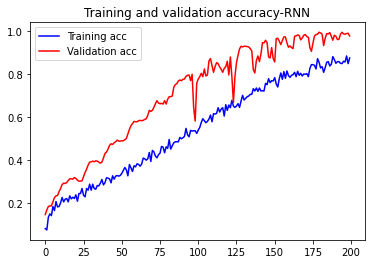

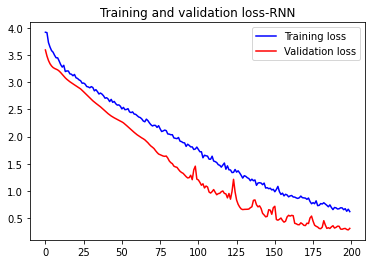

In [161]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-RNN')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-RNN')
plt.legend()
 
plt.show()

In [165]:
test_data=['It was not a good day in my life']
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_test  = np.array( tokenizer.texts_to_sequences(test_data))
x_test = pad_sequences(x_test, maxlen=max_length)
x_test

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 71, 32,
        22]], dtype=int32)

In [166]:
for i in range(0,len(test_data)):
  print('Test sentence:-',test_data[i])
  
  res=modelRNN.predict(x_test)
  labels = ['almosthomeless', 'anxiety', 'assistance', 'domesticviolence',
       'food_pantry', 'homeless', 'ptsd', 'relationships', 'stress',
       'survivorsofabuse']
  print(res, labels[np.argmax(res)])

Test sentence:- It was not a good day in my life


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 25s 25s/step
[[0.19472535 0.00054695 0.35611495 0.02639586 0.03465292 0.32063195
  0.00913568 0.04657808 0.00350915 0.00770909]] assistance


In [167]:
test_data=['I need a new home , my current home is almost broke']
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_test  = np.array( tokenizer.texts_to_sequences(test_data))
x_test = pad_sequences(x_test, maxlen=max_length)
x_test

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  34,  74,  57, 488,  57, 138, 216]],
      dtype=int32)

In [168]:
for i in range(0,len(test_data)):
  print('Test sentence:-',test_data[i])
  
  res=modelRNN.predict(x_test)
  labels = ['almosthomeless', 'anxiety', 'assistance', 'domesticviolence',
       'food_pantry', 'homeless', 'ptsd', 'relationships', 'stress',
       'survivorsofabuse']
  print(res, labels[np.argmax(res)])

Test sentence:- I need a new home , my current home is almost broke


1/1 [==============================] - 0s 210ms/step
[[0.02332318 0.05794984 0.31706443 0.00972511 0.05653831 0.3684562
  0.04195517 0.07634965 0.04108967 0.00754836]] homeless


**The End**